In [2]:
import numpy as np 
import pandas as pd
from pandas import Series
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import acf,pacf,plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA 
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from pylab import mpl

In [4]:
#获取默认路径
import os
print (os.path.abspath('.'))

/Users/stanley/Desktop/python/Brain


In [7]:
data=pd.read_excel('//Users//stanley//Desktop//时间序列分析.xlsx',sheet_name='平稳时间序列',header=0,index_col=0)

In [8]:
ts1 = pd.Series(data['data'].values)  #转化为时间序列数据
ts1.index = pd.Index(sm.tsa.datetools.dates_from_range('1931','2019')) #添加日期

In [9]:
ts1

1931-12-31    -6.12
1932-12-31     2.77
1933-12-31     3.77
1934-12-31   -32.66
1935-12-31    -9.50
              ...  
2015-12-31    10.50
2016-12-31    -5.74
2017-12-31    -5.85
2018-12-31   -36.32
2019-12-31    -6.59
Length: 89, dtype: float64

In [17]:
#ADF单位根检验
def adf_test(ts):
    adftest = adfuller(ts)
    adf_res = pd.Series(adftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key, value in adftest[4].items():
        adf_res['Critical Value (%s)' % key] = value
    return adf_res
adf_test(ts1)
#ADF检验的原假设是：有单位根。
#单位根检验是指检验序列中是否存在单位根，因为存在单位根就是非平稳时间序列了。
#单位根就是指单位根过程，可以证明，序列中存在单位根过程就不平稳，会使回归
#分析中存在伪回归。

Test Statistic                 -4.993859
p-value                         0.000023
Lags Used                      12.000000
Number of Observations Used    76.000000
Critical Value (1%)            -3.519481
Critical Value (5%)            -2.900395
Critical Value (10%)           -2.587498
dtype: float64

In [ ]:
np.r_：是按列连接两个矩阵，就是把两矩阵上下相加，要求列数相等，
类似于pandas中的concat()。
np.c_：是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等，
类似于pandas中的merge()。

     lag        AC           Q       PAC      Prob(>Q)
0    1.0 -0.164778    2.498904 -0.164778  1.139256e-01
1    2.0 -0.184646    5.672805 -0.217709  5.863623e-02
2    3.0 -0.096175    6.543888 -0.182467  8.794764e-02
3    4.0 -0.112939    7.759245 -0.237848  1.008063e-01
4    5.0 -0.081462    8.399068 -0.268846  1.355705e-01
5    6.0 -0.139750   10.304770 -0.439222  1.123904e-01
6    7.0  0.654225   52.578632  0.470634  4.489579e-09
7    8.0 -0.085409   53.308005  0.020832  9.401080e-09
8    9.0 -0.132152   55.076020  0.097069  1.177992e-08
9   10.0 -0.114121   56.411182 -0.067540  1.719128e-08
10  11.0 -0.121493   57.943809 -0.056748  2.228599e-08
11  12.0 -0.116190   59.363774 -0.267602  2.947531e-08
12  13.0 -0.092469   60.274962 -0.157946  4.690885e-08
13  14.0  0.633483  103.610027  0.219552  9.605990e-16
14  15.0 -0.159470  106.393317 -0.180168  7.915249e-16
15  16.0 -0.125674  108.145585 -0.059986  1.008804e-15
16  17.0  0.003601  108.147043  0.114934  2.690138e-15
17  18.0 -

/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1016: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


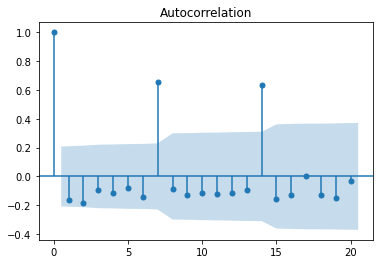

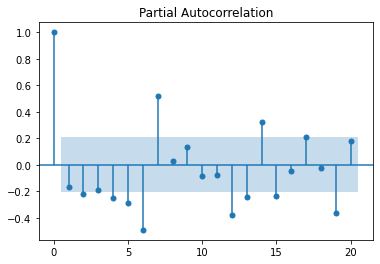

In [23]:
# Ljung-Box 统计检验；绘制ACF,PACF图，确定模型阶数
def get_pdq(ts): 
    r,rac,Q = sm.tsa.acf(ts, qstat=True)
    prac = pacf(ts,method='ywmle')
    table_data = np.c_[range(1,len(r)), r[1:],rac,prac[1:len(rac)+1],Q]
    table = pd.DataFrame(table_data, columns=['lag', "AC","Q", "PAC", "Prob(>Q)"])
    print(table)
    plot_acf(ts)
    plot_pacf(ts)
    plt.show()
get_pdq(ts1)

In [24]:

#采用AIC,BIC,HQIC三准则，选择结果最小的模型效果最好
arma_mod1 = sm.tsa.ARMA(ts1,(4,0)).fit()
arma_mod2 = sm.tsa.ARMA(ts1,(4,1)).fit()
arma_mod3 = sm.tsa.ARMA(ts1,(7,0)).fit()
arma_mod4 = sm.tsa.ARMA(ts1,(7,1)).fit()
print(arma_mod3.aic,arma_mod3.bic,arma_mod3.hqic)
print(arma_mod4.aic,arma_mod4.bic,arma_mod4.hqic)
print(arma_mod2.aic,arma_mod2.bic,arma_mod2.hqic)
print(arma_mod1.aic,arma_mod1.bic,arma_mod1.hqic)

/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided,

759.9822616626196 782.3799889902089 769.010142794677
761.3713123954104 786.2576760927318 771.4022914310297
801.4147015090409 818.8351560971659 808.4363868339744
808.8672224300728 823.7990406484657 814.8858098514444
